In [1]:
# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import psycopg2
import sys
sys.path.insert(0, "/home/jovyan/work")
sys.path.insert(0, "/opt/airflow/dags")
from stocks.tasks.transform_stock_data import get_datafrom_db, transform_data

In [2]:
# This cell has parameters
execution_date = ""

In [3]:
# Parameters
execution_date = "2021-11-21"


Text(0, 0.5, 'Stocks Price (7 day rolling avg of close price)')

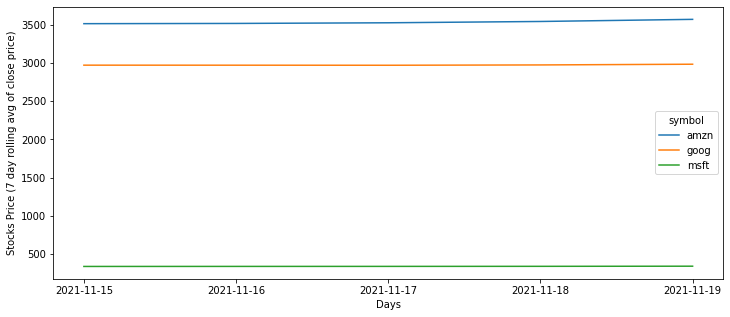

In [4]:
data = get_datafrom_db()
filt_data = transform_data(data,execution_date)

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 5))
  
# plot a simple time series plot
sns.lineplot( x = 'date',
             y = '7day_rolling_avg',
             hue='symbol',
             data = filt_data
            )
             
plt.xlabel( 'Days')

# Define the date format
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.ylabel('Stocks Price (7 day rolling avg of close price)')